# **Matplotlib Application Programming Interface**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# make data to plot
x = np.linspace(0, 2, 100)
ys = [x, x**2, x**3, x**4]

# Introduction

Object-oriented programming is a programming model that addresses the limitations of procedural programming, which places more emphasis on processing (procedure, function) than on data.

Procedural programming is based around variables, data structures, and procedures operating on variables and data structures.

Object-oriented programming model organizes software design around entities called objects. An object encapsulates both data and methods that operate on the data.

The initial goal of Matplotlib was to emulate Matlab's plotting functions. Since Matlab is a functional language, Matplotlib implemented a functional approach to generating plots.

Subsequently however, an object-oriented approach was implemented as well.

These two approaches are fundamentally different.

The object-oriented approach is recommended since it is consistent with the rest of Python which is an object-oriented language.

# Parts of a figure

A figure has three main parts: **`Figure`**, **`Axes`** and **`Axis`**.

The diagram below shows these three parts of a figure:

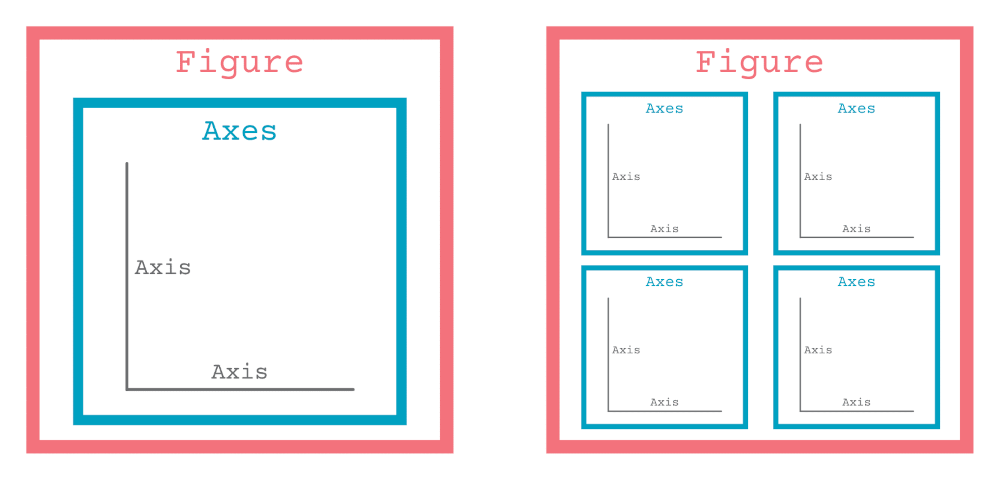
<br><br>

A figure has three main parts:

* **`Figure`**: this is the whole region of space that is created when you create any figure.<br>
The `Figure` object is the overall object that contains everything else.
* **`Axes`**: an `Axes` object is the object that contains the x-axis and y-axis for a 2D plot.<br>
You can have more than one `Axes` object in a `Figure`.<br>
Each `Axes` object corresponds to a plot or a graph.

* **`Axis`**: an `Axis` object contains one of the axes, the x-axis or the y-axis for a 2D plot.

Therefore, a figure is a `Figure` object which has one or more `Axes` objects.<br>
Each `Axes` object has two or three `Axis` objects.

An `Axes` object encapsulates all the elements of an individual plot.<br>
It contains the plotted data, axis ticks, labels, title, legend, etc.
Its methods are the main interface for manipulating the plot.

The diagram below shows these three parts of a figure:

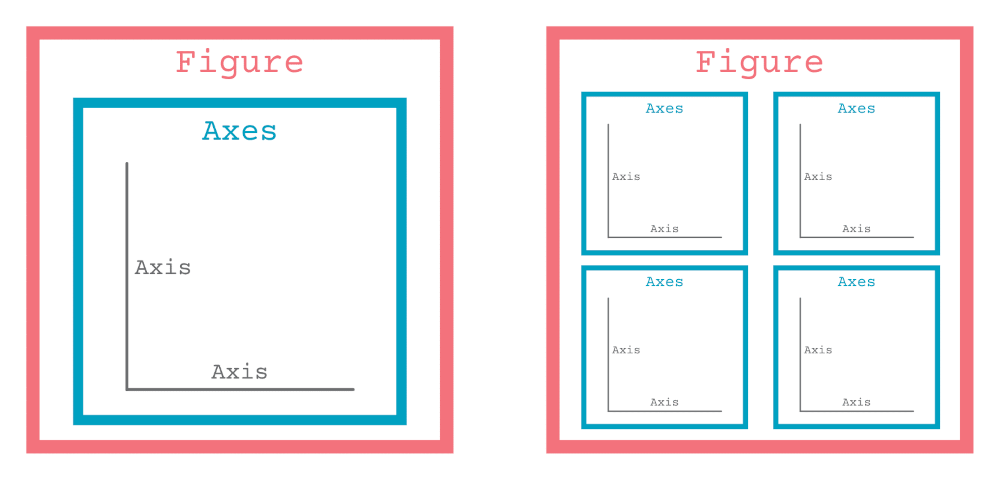
<br><br>

The diagram on the left shows the simplest figure you can create in Matplotlib in which the `Figure` object contains one `Axes` object.The `Axes` object contains two `Axis` objects.

The diagram on the right shows four `Axes` objects within the same `Figure` object. These are called subplots.

There are other objects present in a figure.

The general data type for objects in a figure is the **`Artist`** type. These include components of a figure such as the markers, lines connecting the data points, titles, legends, labels, and more.

When looking at Matplotlib visualization, you are almost always looking at Artists placed on a figure.

Almost every object you interact with on a figure is called an Artist and is a subclass of the `Artist` class.

The `Figure` and the `Axes` are Artists, and contain `Axis` Artists and Artists that contain data or annotation information such as the titles, legends and labels.

# Application Programming Interfaces (APIs)

Since Matplotlib implements two different approaches to generating plots, the functional and the object-oriented, it offers two different interfaces to plotting: the functional interface and the object-oriented interface.

### Functional interface

In the functional interface (also known as implicite interface or pyplot interface), we use a global state-based interface which is encapsulated in the `pyplot` module to plot to the current figure.

We rely on `pyplot` to implicitly create and manage the `Figure` and `Axes`, and use `pyplot` functions for plotting (`plot()`, `hist()`, `bar()`, `pie()`, etc.)

In the function calls, a lot of objects get implicitly created and passed around without making themselves known to the programmer who tend to prefer a more explicit style of programming.

This interface is convenient for quick plot generation and modification but may lack scalability for complex and multiple plots.

### Object-oriented interface

In the object-oriented interface (also known as explicit interface or Axes interface), we explicitly create an instance of `Figure` and instances of `Axes` and then call methods on them to build up the visualization step by step.

This interface is recommended because it is more efficient, readable, explicit and flexible. It gives us more control when we create figures that contain multiple plots.

# Functional interface

In the previous lessons of this course, we use the functional interface to plot the figures.

**Example:** using the functional interface.

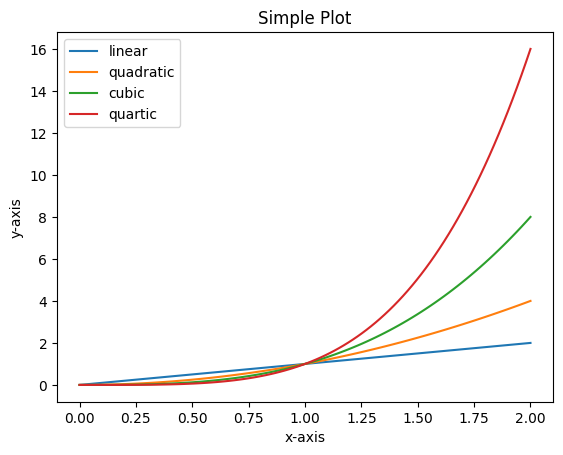

In [3]:
plt.figure()
plt.plot(x, ys[0], label='linear')    # plot data on the (implicit) Axes.
plt.plot(x, ys[1], label='quadratic')
plt.plot(x, ys[2], label='cubic')
plt.plot(x, ys[3], label='quartic')
plt.xlabel('x-axis')    # add an x-label to the Axes.
plt.ylabel('y-axis')    # add a y-label to the Axes.
plt.title("Simple Plot")    # add a title to the Axes.
plt.legend();    # add a legend.

# Object-oriented interface

When using the object-oriented interface, we create the `Figure` and the `Axes` objects and call their methods to do the plotting

An `Axes` object encapsulates all the elements of an individual plot in a figure.

It contains most of the plot elements: `Axis`, `Tick`, `Line2D`, `Text`, `Polygon`, etc., and sets the coordinate system.

We call methods that do the plotting directly from the `Axes`, which gives us much more flexibility and power in customizing our plot.

## The Figure and the Axes

We use the `pyplot.figure` method to create the `Figure` object.

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

We use the `Figure.add_subplot` method to add an `Axes` to the `Figure`.

In [ ]:
ax = fig.add_subplot()

## The **`pyplot.subplots`** method

Users typically want an `Axes` or a grid of `Axes` when they create a `Figure`.<br>
So in addition to the `pyplot.figure` method, there are convenience methods that return both a `Figure` and some `Axes`.

We use the **`pyplot.subplots`** method to create a `Figure` and a grid of `Axes` with a single call, while providing reasonable control over how the individual `Axes` are created.

Typical idioms for handling the return value of the `pyplot.subplots` method are:

```python
# using the variable ax for a single Axes
fig, ax = plt.subplots()

# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
```

**Example:** create a `Figure` and an `Axes`.<br>
We use the `Figure.suptitle` method to add a centered super title to the `Figure`.<br>
We use the `Axes.set_title` method to set a title for the `Axes`.

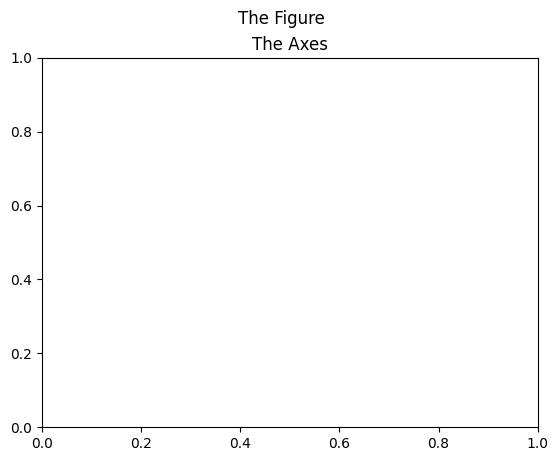

In [4]:
fig, ax = plt.subplots()    # create a Figure and an Axes

fig.suptitle("The Figure")    # add a title to the Figure

ax.set_title("The Axes");    # add a title to the Axes

**Example:** Create a `Figure` and an `Axes` and plot data.

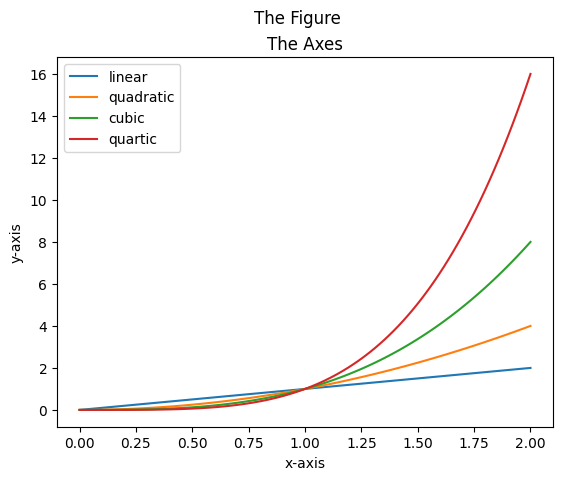

In [5]:
fig, ax = plt.subplots()

fig.suptitle("The Figure")

# plot data on the Axes
ax.plot(x, ys[0], label='linear')
ax.plot(x, ys[1], label='quadratic')
ax.plot(x, ys[2], label='cubic')
ax.plot(x, ys[3], label='quartic')

ax.set_title("The Axes")
ax.set_xlabel('x-axis')    # add an x-label to the Axes
ax.set_ylabel('y-axis')    # add a y-label to the Axes
ax.legend();    # add a legend

### Figure layout for multiple subploats

**Constrained layout**<br>
When the figure contains multiple subploats, we use constrained layout to fit plots within the figure cleanly.<br>
Constrained layout automatically adjusts subplots so that decorations like tick labels, legends, and colorbars do not overlap.

```python
# create a Figure and a 2x2 grid of Axes
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
```

### Accessing subplots by indexing the **`Axes`** array

**Example:** Create a `Figure` and a 2x2 grid of `Axes`. Access subplots by indexing the `Axes` array.<br>

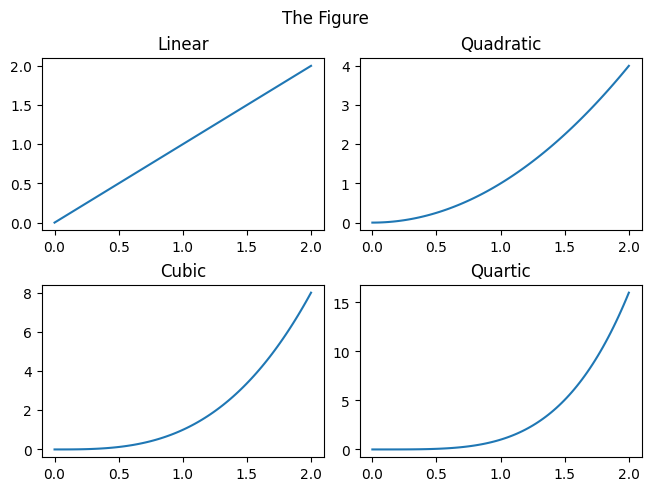

In [6]:
# create a Figure and a 2x2 grid of Axes
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')

fig.suptitle("The Figure")

# plot data on each Axes in the grid
axs[0, 0].plot(x, ys[0])
axs[0, 1].plot(x, ys[1])
axs[1, 0].plot(x, ys[2])
axs[1, 1].plot(x, ys[3])

# set title for each Axes in the grid
axs[0, 0].set_title("Linear")
axs[0, 1].set_title("Quadratic")
axs[1, 0].set_title("Cubic")
axs[1, 1].set_title("Quartic");

### Accessing subplots by unpacking the **`Axes`** array

**Example:** Create a `Figure` and a 2x2 grid of `Axes`. Access subplots by unpacking the `Axes` array.

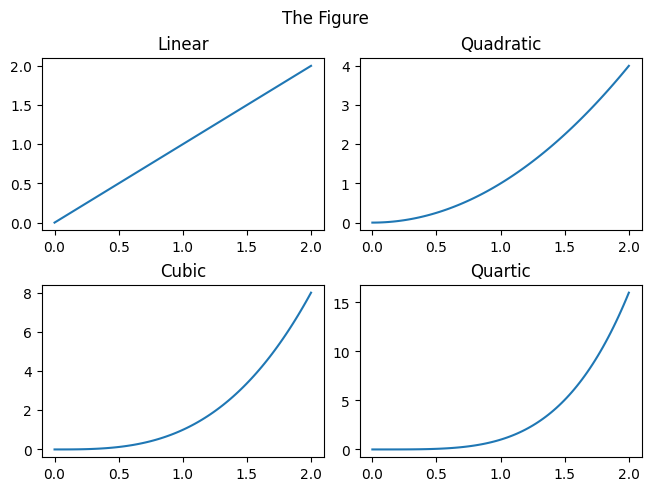

In [7]:
# create a Figure and a 2x2 grid of Axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, layout='constrained')

fig.suptitle("The Figure")

# plot data on each Axes in the grid
ax1.plot(x, ys[0])
ax2.plot(x, ys[1])
ax3.plot(x, ys[2])
ax4.plot(x, ys[3])

# set title for each Axes in the grid
ax1.set_title("Linear")
ax2.set_title("Quadratic")
ax3.set_title("Cubic")
ax4.set_title("Quartic");

## Iterating through the **`Axes`** objects

The `Figure.axes` property is a `list` containing the `Axes` in the `Figure`.

We use the `enumerate()` function to iterate through the list of `Axes` and get both the index and the element.

**Example:** iterate through the `Axes` objects.

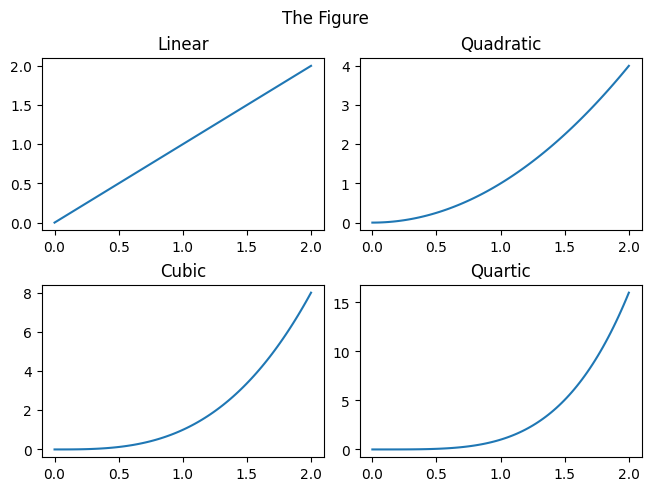

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')

fig.suptitle("The Figure")

titles = ["Linear", "Quadratic", "Cubic", "Quartic"]

for index, ax in enumerate(fig.axes):
    ax.plot(x, ys[index])
    ax.set_title(titles[index])

# Anatomy of a figure

<br><br>
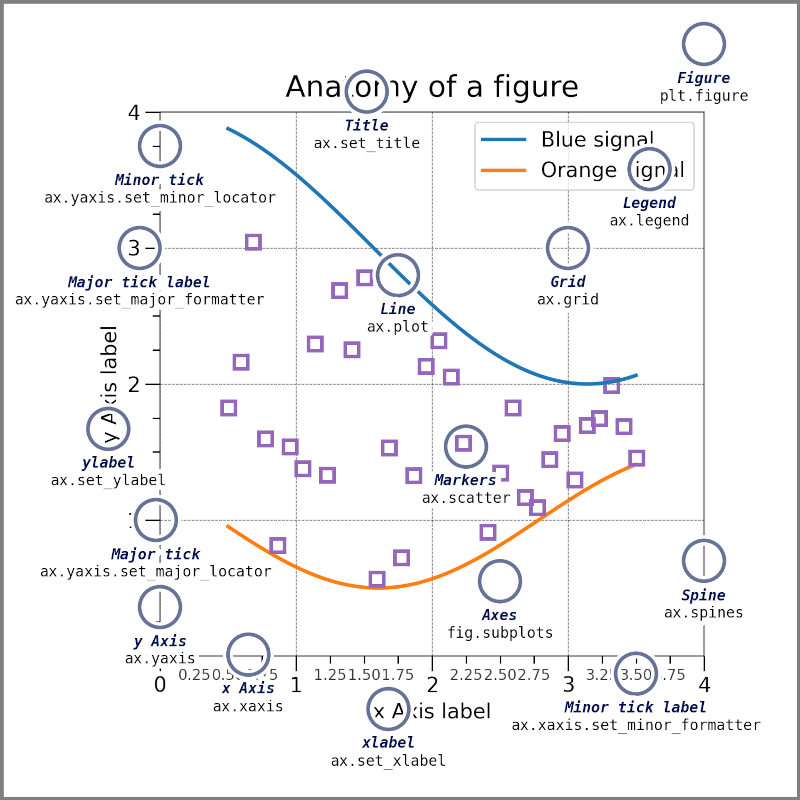
<br><br>

# API classes

## The **`Figure`** class

> **`matplotlib.figure.Figure`**<br>
The top level container for all the plot elements.
```python
class matplotlib.figure.Figure(figsize=None, dpi=None, *,
facecolor=None, edgecolor=None, linewidth=0.0, frameon=None,
subplotpars=None, tight_layout=None, constrained_layout=None,
layout=None, **kwargs)
```

**Parameters**
* `figsize`: 2-tuple of floats, default: [6.4, 4.8]<br>
Figure dimension (width, height) in inches.
* `dpi`: float, default: 100.0<br>
Dots per inch.

View [details](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) on the API reference page.

## The **`Axes`** class

> **`matplotlib.axes.Axes`**<br>
An Axes object encapsulates all the elements of an individual subplot in a figure.<br>
It contains most of the subplot elements: `Axis`, `Tick`, `Line2D`, `Text`, `Polygon`, etc., and sets the coordinate system.<br>
Like all visible elements in a figure, `Axes` is an `Artist` subclass.
```python
class matplotlib.axes.Axes(fig, *args, facecolor=None, frameon=True,
sharex=None, sharey=None, label='', xscale=None, yscale=None,
box_aspect=None, forward_navigation_events='auto', **kwargs)
```

**Parameters**
* `fig`: `Figure`<br>
The Axes is built in the `Figure` fig.

View [details](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) on the API reference page.